In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt 

In [2]:
dataset=pd.read_csv('cancer_reg.csv')

<AxesSubplot:>

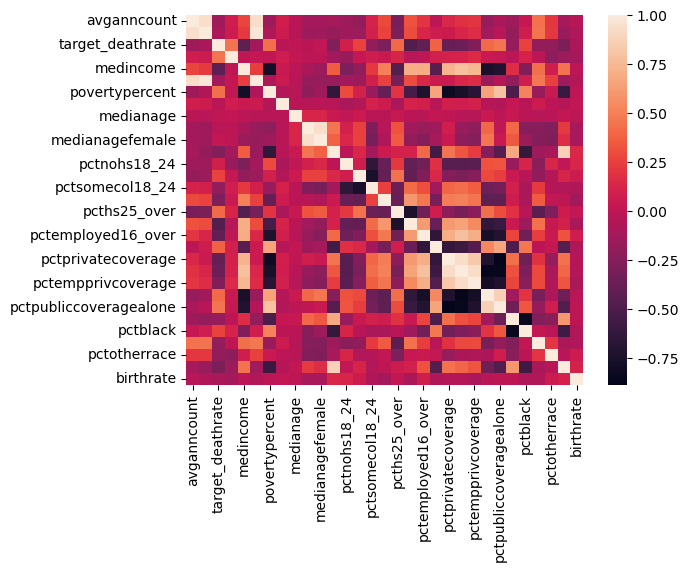

In [3]:
sns.heatmap(dataset.corr( ), annot=False)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [5]:
dataset = dataset.drop('pctsomecol18_24', axis=1) # Remove pctsomecol18_24 
dataset = dataset.drop('binnedinc', axis=1) # Remove pctsomecol18_24 
dataset = dataset.drop('geography', axis=1) # Remove pctsomecol18_24 

In [6]:
df = dataset.astype('float32')
print(df.dtypes)

avganncount                float32
avgdeathsperyear           float32
target_deathrate           float32
incidencerate              float32
medincome                  float32
popest2015                 float32
povertypercent             float32
studypercap                float32
medianage                  float32
medianagemale              float32
medianagefemale            float32
percentmarried             float32
pctnohs18_24               float32
pcths18_24                 float32
pctbachdeg18_24            float32
pcths25_over               float32
pctbachdeg25_over          float32
pctemployed16_over         float32
pctunemployed16_over       float32
pctprivatecoverage         float32
pctprivatecoveragealone    float32
pctempprivcoverage         float32
pctpubliccoverage          float32
pctpubliccoveragealone     float32
pctwhite                   float32
pctblack                   float32
pctasian                   float32
pctotherrace               float32
pctmarriedhouseholds

In [7]:
print(df.isna().sum())

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
medianage                    0
medianagemale                0
medianagefemale              0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over         152
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    609
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrate                    0
dtype: int64


In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
print(df.describe())

        avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.337463        185.965866        178.664124     448.267517   
std     1416.357178        504.133484         27.751503      54.560799   
min        6.000000          3.000000         59.700001     201.300003   
25%       76.000000         28.000000        161.199997     420.299988   
50%      171.000000         61.000000        178.100006     453.549408   
75%      518.000000        149.000000        195.199997     480.849991   
max    38150.000000      14010.000000        362.799988    1206.900024   

           medincome    popest2015  povertypercent  studypercap    medianage  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.300781  1.026374e+05       16.878162   155.399414    45.272346   
std     12040.098633  3.290592e+05        6.409101   529.622437    45.304512   
min     22640

In [10]:
print(df[df > 100000].count())

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                   11
popest2015                 582
povertypercent               0
studypercap                  0
medianage                    0
medianagemale                0
medianagefemale              0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over           0
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone      0
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrate                    0
dtype: int64


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # scale the data using minmax scaler
scaler.fit(df)
df[:] = scaler.fit_transform(df[:])
df_scaled = pd.DataFrame(df[:], columns=df.columns[:])
df_scaled

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,0.036467,0.033269,0.347080,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,...,0.518255,0.491259,0.402597,0.259091,0.797112,0.030190,0.113138,0.043965,0.542157,0.286917
1,0.004378,0.004783,0.335203,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231679,...,0.602848,0.526224,0.369202,0.288636,0.880051,0.011275,0.052704,0.089228,0.406297,0.203182
2,0.002517,0.003355,0.379413,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,...,0.439873,0.374126,0.573284,0.420455,0.898912,0.008606,0.010932,0.065522,0.571001,0.174879
3,0.011037,0.014207,0.445728,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,...,0.389241,0.375874,0.632653,0.509091,0.908071,0.009106,0.027250,0.032498,0.508852,0.215878
4,0.001337,0.001642,0.279446,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,...,0.446203,0.377622,0.608534,0.456818,0.934344,0.003144,0.015623,0.011737,0.563423,0.318700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0.051297,0.000857,0.296602,0.250845,0.236138,0.000542,0.208145,0.000000,0.036397,0.442080,...,0.620253,0.543706,0.380334,0.240909,0.891769,0.044652,0.007687,0.040555,0.509620,0.364506
3043,0.051297,0.002856,0.298251,0.250845,0.252138,0.003569,0.352941,0.038636,0.013462,0.163121,...,0.594937,0.613636,0.326531,0.343182,0.729471,0.027072,0.094908,0.336995,0.526760,0.383870
3044,0.051297,0.003070,0.310789,0.250845,0.276751,0.003315,0.266968,0.201690,0.014293,0.191489,...,0.583861,0.599650,0.285714,0.322727,0.865944,0.026914,0.030889,0.135480,0.583874,0.366179
3045,0.051297,0.003498,0.380403,0.250845,0.272877,0.002437,0.228507,0.000000,0.027755,0.342790,...,0.642405,0.631119,0.339518,0.259091,0.920999,0.013689,0.005740,0.050841,0.644333,0.355570


In [12]:
X = df_scaled.drop(['target_deathrate'], axis=1)
y = df_scaled['target_deathrate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [13]:
base_model = DecisionTreeRegressor()

In [14]:
regr = BaggingRegressor(base_estimator=base_model, n_estimators=50, random_state=1)

In [15]:
regr.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50,
                 random_state=1)

In [16]:
y_pred_bagged_train = regr.predict(X_train)
y_pred_bagged_test = regr.predict(X_test)

r2_bagged_train = r2_score(y_train, y_pred_bagged_train)
print("Training R^2 for Bagged Trees Model: ", r2_bagged_train*100)

r2_bagged_test = r2_score(y_test, y_pred_bagged_test)
print("Testing R^2 for Bagged Trees Model: ", r2_bagged_test*100)

RMSE_bagged_train = sqrt(mean_squared_error(y_train, y_pred_bagged_train))
print("RMSE for Training Data: ", RMSE_bagged_train)

RMSE_bagged_test = sqrt(mean_squared_error(y_test, y_pred_bagged_test))
print("RMSE for Testing Data: ", RMSE_bagged_test)


Training R^2 for Bagged Trees Model:  92.90806985480229
Testing R^2 for Bagged Trees Model:  55.6490549576111
RMSE for Training Data:  0.024196768319860427
RMSE for Testing Data:  0.062301113819457826


In [17]:
true_value = y_test
predicted_value = y_pred_bagged_test

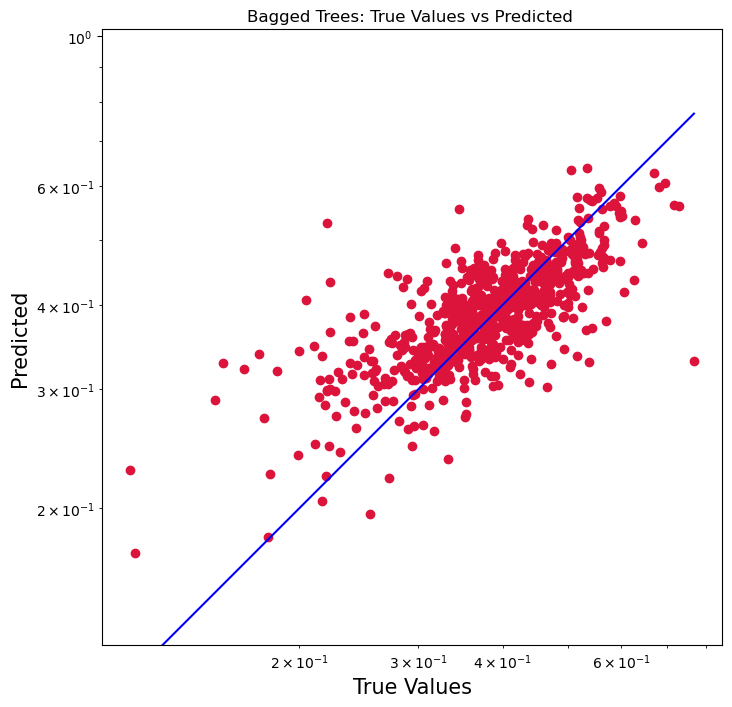

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Bagged Trees: True Values vs Predicted ")
plt.axis('equal')
plt.show()